<a href="https://colab.research.google.com/github/Aurooooooooora/Ma412_Project/blob/Models/Na%C3%AFve_Bayes_'Fino'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset
dataset = load_dataset("adsabs/SciX_UAT_keywords")

print(dataset)
print(dataset['train'][0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

(…)-00000-of-00001-b21313e511aa601a.parquet:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

(…)-00000-of-00001-66ce8665444026dc.parquet:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18677 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/3025 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['bibcode', 'title', 'abstract', 'verified_uat_ids', 'verified_uat_labels'],
        num_rows: 18677
    })
    val: Dataset({
        features: ['bibcode', 'title', 'abstract', 'verified_uat_ids', 'verified_uat_labels'],
        num_rows: 3025
    })
})
{'bibcode': '2020ApJ...891..100S', 'title': 'Dynamic Potential Sputtering of Lunar Analog Material by Solar Wind Ions', 'abstract': 'Pyroxenes ((Ca, Mg, Fe, Mn)<SUB>2</SUB>Si<SUB>2</SUB>O<SUB>6</SUB>) belong to the most abundant rock forming minerals that make up the surface of rocky planets and moons. Therefore, sputtering of pyroxenes by solar wind ions has to be considered as a very important process for modifying the surface of planetary bodies. This is increased due to potential sputtering by multiply charged ions; to quantify this effect, sputtering of wollastonite (CaSiO<SUB>3</SUB>) by He<SUP>2+</SUP> ions was investigated. Thin films of CaSiO<SUB>3</SUB> deposited on a quart

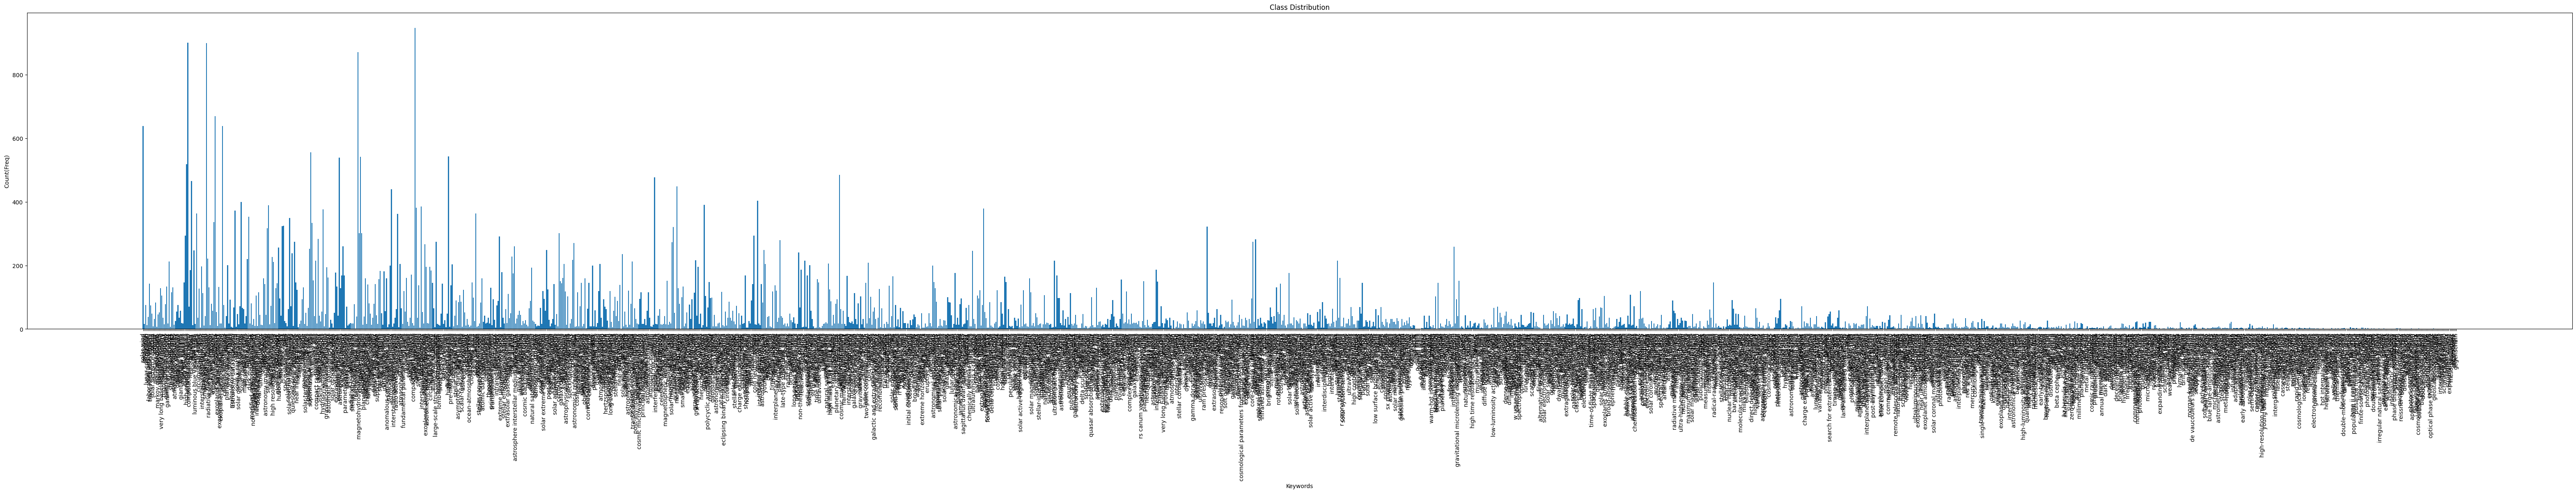

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

keywords = [kw for sample in dataset['train'] for kw in sample['verified_uat_labels']]
class_distribution = Counter(keywords)

plt.figure(figsize=(80,10))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=90)
plt.xlabel('Keywords')

plt.ylabel('Count(Freq)')
plt.title('Class Distribution')
plt.show()

In [5]:
pip install nltk

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_text(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text.lower())
  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  return " ".join(filtered_tokens)

processed_texts = [preprocess_text(sample['title']) for sample in dataset['train']]

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(processed_texts)

print(X.shape)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


(18677, 5000)


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform([sample['verified_uat_labels'] for sample in dataset['train']])

print(y.shape)

(18677, 1864)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(processed_texts[:5])

['dynamic potential sputtering lunar analog material solar wind ions', 'generation objects planet nine', 'leveraging gravity field spectrum icy satellite interior structure determination case europa europa clipper mission', 'inverse multiview multicalibrator inverse phase referencing microarcsecond long baseline interferometry astrometry', 'first lhaaso catalog sources']


Naïve Bayes

In [11]:
import numpy as np

label_frequencies = np.sum(y_train, axis=0)
total_samples = y_train.shape[0]
always_present_labels = np.where(label_frequencies == total_samples)[0]

print("Always Present Labels:")
print([mlb.classes_[i]for i in always_present_labels])

y_train = np.delete(y_train, always_present_labels, axis=1)
y_test = np.delete(y_test, always_present_labels, axis=1)

mlb.classes_ = np.delete(mlb.classes_, always_present_labels)

Always Present Labels:
[]


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

nb_model = OneVsRestClassifier(MultinomialNB())
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='micro'))
print("Recall:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 75 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 196 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 206 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 238 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 340 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 378 is present in all training e

Accuracy: 0.0013383297644539614
Precision: 0.8205128205128205
Recall: 0.00199252801992528
F1 Score: 0.003975402198894341
Classification Report:
                                                    precision    recall  f1-score   support

                                     a dwarf stars       0.00      0.00      0.00         1
                                     a giant stars       0.00      0.00      0.00         0
                                           a stars       0.00      0.00      0.00         8
                                  a subgiant stars       0.00      0.00      0.00         0
                                a supergiant stars       0.00      0.00      0.00         0
                                     ab photometry       0.00      0.00      0.00         1
                                    abell clusters       0.00      0.00      0.00         4
                                absolute magnitude       0.00      0.00      0.00         1
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me